In [2]:
# Importing libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'

In [1]:
import torch
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print(x)
else:
    print ("MPS device not found.")

NameError: name 'mps_device' is not defined

In [19]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [20]:
# # Define the GAN architecture
# # For image size of 32x32

# class Generator(nn.Module):
#     """Generates artificial images form a random vector as input.
#     """

#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             ## Deconvolution layer(vector size, size of feature maps, kernel size, stride, padding, bias)
#             nn.ConvTranspose2d(100, 128, 4, 1, 0, bias=False), #4x4
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False), #8x8
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False), #16x16
#             nn.BatchNorm2d(32),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(32, 3, 4, 2, 1, bias=False), #32x32
#             nn.Tanh()
#         )

#     def forward(self, input_vector):
#         return self.main(input_vector)


# class Discriminator(nn.Module):
#     """Evaluates the artificial images from the Generator and
#     either accepts or rejects the image (returns value between 0 - 1).
#     """

#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Conv2d(3, 32, 4, 2, 1, bias=False), # 16x16
#             nn.LeakyReLU( .2, inplace=True),            
#             nn.Conv2d(32, 64, 4, 2, 1, bias=False), # 8x8
#             nn.LeakyReLU(.2, inplace=True),
#             nn.BatchNorm2d(64),            
#             nn.Conv2d(64, 128, 4, 2, 1, bias=False), # 4x4
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(128, 1, 4, 1, 0, bias=False), # 1x1
#             nn.Sigmoid()
#         )

#     def forward(self, input_image):
#         return self.main(input_image).view(-1)

In [21]:
# Define the GAN architecture
# For image size of 64x64

class Generator(nn.Module):
    """Generates artificial images form a random vector as input.
    """

    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            ## Deconvolution layer(vector size, size of feature maps, kernel size, stride, padding, bias) # input size 1x1
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False), #4x4
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False), #8x8
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False), #16x16
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False), #32x32
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False), #64x64
            nn.Tanh()
        )

    def forward(self, input_vector):
        return self.main(input_vector)


class Discriminator(nn.Module):
    """Evaluates the artificial images from the Generator and
    either accepts or rejects the image (returns value between 0 - 1).
    """

    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False), #32x32
            nn.LeakyReLU(.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False), #16x16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False), #8x8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False), #4x4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False), #1x1
            nn.Sigmoid()
        )

    def forward(self, input_image):
        return self.main(input_image).view(-1)

In [22]:
# # Define the GAN architecture
# # For image size of 128x128

# class Generator(nn.Module):
#     """Generates artificial images form a random vector as input.
#     """

#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             ## Deconvolution layer(vector size, size of feature maps, kernel size, stride, padding, bias)
#             nn.ConvTranspose2d(100, 512, 8, 1, 0, bias=False),
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),          
#             nn.Tanh()
#         )

#     def forward(self, input_vector):
#         return self.main(input_vector)


# class Discriminator(nn.Module):
#     """Evaluates the artificial images from the Generator and
#     either accepts or rejects the image (returns value between 0 - 1).
#     """

#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Conv2d(3, 32, 4, 2, 1, bias=False),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(32, 64, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(64, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(128, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(256, 512, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(.2, inplace=True),
#             nn.Conv2d(512, 1, 4, 1, 0, bias=False),            
#             nn.Sigmoid()
#         )

#     def forward(self, input_image):
#         return self.main(input_image).view(-1)

In [23]:
# # Define the GAN architecture
# # For image size of 224x224

# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             nn.ConvTranspose2d(100, 512, 7, 1, 0, bias=False),
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
#             nn.Tanh()
#         )

#     def forward(self, input_vector):
#         return self.main(input_vector)


# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Conv2d(3, 64, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(64, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(128, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(256, 512, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(512, 1, 4, 1, 0, bias=False),
#             nn.AdaptiveAvgPool2d(1),
#             nn.Sigmoid()
#         )

#     def forward(self, input_image):
#         return self.main(input_image).view(-1)

In [24]:
device

device(type='mps')

In [25]:
# Hyperparameters
num_epochs = 50
batch_size = 64
learning_rate = 0.0002
image_size = 64
nz = 100  # Size of the latent vector

In [26]:
# Create the generator and discriminator instances
generator = Generator()
#generator = Generator(nz)
discriminator = Discriminator()
generator.to(device)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [27]:
discriminator.to(device)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [28]:
# Define loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

In [29]:
# Data loading and preprocessing

data_path= r'/Users/sayedraheel/Desktop/AI part:side projects/cats'

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root = data_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

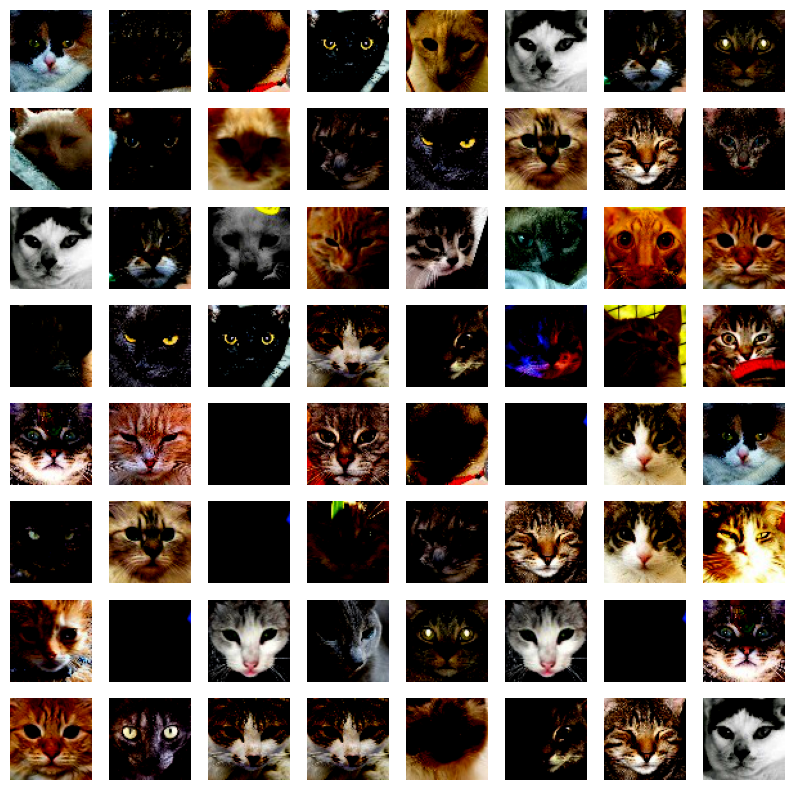

In [30]:
# Randomly select a batch of images from the DataLoader
sample_batch = next(iter(dataloader))

# Get a batch of real images and labels
real_images, _ = sample_batch
real_images = real_images.to(device)

# Plot the random input images
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i in range(8):
    for j in range(8):
        index = np.random.randint(0, batch_size)  # Randomly select an image from the batch
        image = real_images[index].cpu().numpy().transpose((1, 2, 0))
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.show()

In [31]:
# Training loop

# Lists to store losses
losses_D = []
losses_G = []

for epoch in range(num_epochs):
    loss_D_epoch = 0.0
    loss_G_epoch = 0.0
    
    for i, data in enumerate(tqdm(dataloader), 0):
        # Update the Discriminator
        discriminator.zero_grad()
        real_images, _ = data
        batch_size = real_images.size(0)
        label_real = torch.ones((batch_size, 1, 1, 1), device=device)
        #print("label_real",label_real.shape)
        label_fake = torch.zeros((batch_size, 1, 1, 1), device=device)
        #print("label_fake",label_fake.shape)
        real_images = real_images.to(device)
        #print("real_images",real_images.shape)
        output_real = discriminator(real_images).view(-1, 1, 1, 1)
        #print("output_real",output_real.shape)
        error_real = criterion(output_real, label_real)
        error_real.backward()

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake_images = generator(noise)
        output_fake = discriminator(fake_images.detach()).view(-1, 1, 1, 1)
        error_fake = criterion(output_fake, label_fake)
        error_fake.backward()
        optimizer_D.step()

        # Update the Generator
        generator.zero_grad()
        label_real.fill_(1.0)
        output_generated = discriminator(fake_images).view(-1, 1, 1, 1)
        error_generator = criterion(output_generated, label_real)
        error_generator.backward()
        optimizer_G.step()

        loss_D_epoch += (error_real.item() + error_fake.item())
        loss_G_epoch += error_generator.item()
        
    # Calculate average losses for the epoch
    avg_loss_D = loss_D_epoch / len(dataloader)
    avg_loss_G = loss_G_epoch / len(dataloader)

    # Append losses to lists
    losses_D.append(avg_loss_D)
    losses_G.append(avg_loss_G)

    # Print training stats
    print(f'[{epoch}/{num_epochs}] Avg. Loss_D: {avg_loss_D:.4f} Avg. Loss_G: {avg_loss_G:.4f}')
    

100%|██████████| 247/247 [01:17<00:00,  3.20it/s]


[0/50] Avg. Loss_D: 0.5626 Avg. Loss_G: 6.1953


100%|██████████| 247/247 [01:09<00:00,  3.55it/s]


[1/50] Avg. Loss_D: 0.7548 Avg. Loss_G: 3.7395


100%|██████████| 247/247 [01:10<00:00,  3.52it/s]


[2/50] Avg. Loss_D: 0.7895 Avg. Loss_G: 4.3404


100%|██████████| 247/247 [01:09<00:00,  3.55it/s]


[3/50] Avg. Loss_D: 0.7357 Avg. Loss_G: 4.6498


100%|██████████| 247/247 [01:10<00:00,  3.51it/s]


[4/50] Avg. Loss_D: 0.7234 Avg. Loss_G: 4.5940


100%|██████████| 247/247 [01:08<00:00,  3.60it/s]


[5/50] Avg. Loss_D: 0.6627 Avg. Loss_G: 4.4774


100%|██████████| 247/247 [01:09<00:00,  3.58it/s]


[6/50] Avg. Loss_D: 0.6314 Avg. Loss_G: 4.6236


100%|██████████| 247/247 [01:10<00:00,  3.48it/s]


[7/50] Avg. Loss_D: 0.5675 Avg. Loss_G: 4.7891


100%|██████████| 247/247 [01:08<00:00,  3.59it/s]


[8/50] Avg. Loss_D: 0.5716 Avg. Loss_G: 4.7553


100%|██████████| 247/247 [01:10<00:00,  3.53it/s]


[9/50] Avg. Loss_D: 0.4657 Avg. Loss_G: 4.8787


100%|██████████| 247/247 [01:11<00:00,  3.46it/s]


[10/50] Avg. Loss_D: 0.4903 Avg. Loss_G: 5.0113


100%|██████████| 247/247 [01:10<00:00,  3.49it/s]


[11/50] Avg. Loss_D: 0.4608 Avg. Loss_G: 5.0445


100%|██████████| 247/247 [01:12<00:00,  3.42it/s]


[12/50] Avg. Loss_D: 0.4390 Avg. Loss_G: 5.1340


100%|██████████| 247/247 [01:12<00:00,  3.41it/s]


[13/50] Avg. Loss_D: 0.3937 Avg. Loss_G: 5.1089


100%|██████████| 247/247 [01:09<00:00,  3.54it/s]


[14/50] Avg. Loss_D: 0.4085 Avg. Loss_G: 5.1865


100%|██████████| 247/247 [01:12<00:00,  3.41it/s]


[15/50] Avg. Loss_D: 0.3638 Avg. Loss_G: 5.3172


100%|██████████| 247/247 [01:14<00:00,  3.33it/s]


[16/50] Avg. Loss_D: 0.3185 Avg. Loss_G: 5.5224


100%|██████████| 247/247 [01:15<00:00,  3.29it/s]


[17/50] Avg. Loss_D: 0.3447 Avg. Loss_G: 5.3787


100%|██████████| 247/247 [01:12<00:00,  3.41it/s]


[18/50] Avg. Loss_D: 0.3665 Avg. Loss_G: 5.5355


100%|██████████| 247/247 [01:11<00:00,  3.44it/s]


[19/50] Avg. Loss_D: 0.3021 Avg. Loss_G: 5.5408


100%|██████████| 247/247 [01:11<00:00,  3.47it/s]


[20/50] Avg. Loss_D: 0.2792 Avg. Loss_G: 5.8602


100%|██████████| 247/247 [01:11<00:00,  3.45it/s]


[21/50] Avg. Loss_D: 0.2749 Avg. Loss_G: 5.9636


100%|██████████| 247/247 [01:11<00:00,  3.45it/s]


[22/50] Avg. Loss_D: 0.2568 Avg. Loss_G: 5.8910


100%|██████████| 247/247 [01:11<00:00,  3.45it/s]


[23/50] Avg. Loss_D: 0.2163 Avg. Loss_G: 5.9544


100%|██████████| 247/247 [01:13<00:00,  3.35it/s]


[24/50] Avg. Loss_D: 0.2390 Avg. Loss_G: 6.1902


100%|██████████| 247/247 [01:08<00:00,  3.59it/s]


[25/50] Avg. Loss_D: 0.2152 Avg. Loss_G: 6.2529


100%|██████████| 247/247 [01:08<00:00,  3.60it/s]


[26/50] Avg. Loss_D: 0.2812 Avg. Loss_G: 5.8816


100%|██████████| 247/247 [01:09<00:00,  3.58it/s]


[27/50] Avg. Loss_D: 0.1905 Avg. Loss_G: 6.2621


100%|██████████| 247/247 [01:09<00:00,  3.54it/s]


[28/50] Avg. Loss_D: 0.2109 Avg. Loss_G: 6.5189


100%|██████████| 247/247 [01:11<00:00,  3.46it/s]


[29/50] Avg. Loss_D: 0.2227 Avg. Loss_G: 6.6163


100%|██████████| 247/247 [01:09<00:00,  3.53it/s]


[30/50] Avg. Loss_D: 0.2477 Avg. Loss_G: 6.4412


100%|██████████| 247/247 [01:09<00:00,  3.55it/s]


[31/50] Avg. Loss_D: 0.2337 Avg. Loss_G: 6.5604


100%|██████████| 247/247 [01:09<00:00,  3.57it/s]


[32/50] Avg. Loss_D: 0.1647 Avg. Loss_G: 6.0045


100%|██████████| 247/247 [01:09<00:00,  3.55it/s]


[33/50] Avg. Loss_D: 0.1855 Avg. Loss_G: 6.4152


100%|██████████| 247/247 [01:09<00:00,  3.56it/s]


[34/50] Avg. Loss_D: 0.1267 Avg. Loss_G: 6.6038


100%|██████████| 247/247 [01:10<00:00,  3.49it/s]


[35/50] Avg. Loss_D: 0.1895 Avg. Loss_G: 6.7498


100%|██████████| 247/247 [01:10<00:00,  3.49it/s]


[36/50] Avg. Loss_D: 0.2661 Avg. Loss_G: 6.4965


100%|██████████| 247/247 [01:10<00:00,  3.51it/s]


[37/50] Avg. Loss_D: 0.1889 Avg. Loss_G: 6.2591


100%|██████████| 247/247 [01:09<00:00,  3.54it/s]


[38/50] Avg. Loss_D: 0.1411 Avg. Loss_G: 6.5338


100%|██████████| 247/247 [01:09<00:00,  3.54it/s]


[39/50] Avg. Loss_D: 0.2260 Avg. Loss_G: 6.8397


100%|██████████| 247/247 [01:10<00:00,  3.53it/s]


[40/50] Avg. Loss_D: 0.1795 Avg. Loss_G: 6.5830


100%|██████████| 247/247 [01:10<00:00,  3.51it/s]


[41/50] Avg. Loss_D: 0.1709 Avg. Loss_G: 6.5365


100%|██████████| 247/247 [01:11<00:00,  3.47it/s]


[42/50] Avg. Loss_D: 0.1979 Avg. Loss_G: 6.7676


100%|██████████| 247/247 [01:10<00:00,  3.49it/s]


[43/50] Avg. Loss_D: 0.2032 Avg. Loss_G: 6.7597


100%|██████████| 247/247 [01:11<00:00,  3.48it/s]


[44/50] Avg. Loss_D: 0.2322 Avg. Loss_G: 6.6593


 25%|██▍       | 61/247 [00:22<01:07,  2.74it/s]


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/folder.py", line 229, in __getitem__
    sample = self.loader(path)
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/folder.py", line 268, in default_loader
    return pil_loader(path)
  File "/Users/sayedraheel/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/folder.py", line 246, in pil_loader
    with open(path, "rb") as f:
FileNotFoundError: [Errno 2] No such file or directory: '/Users/sayedraheel/Desktop/AI part:side projects/cats/cats/11357.jpg'


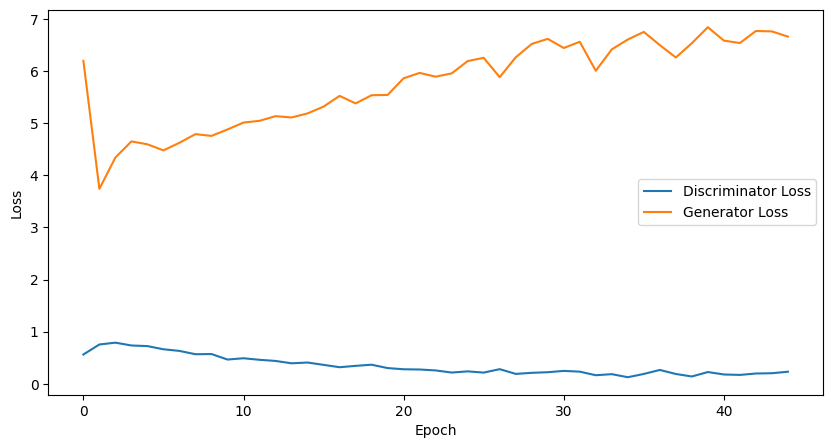

In [32]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(losses_D, label='Discriminator Loss')
plt.plot(losses_G, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Save generated images at the end of training epochs
fake_samples = generator(torch.randn(64, nz, 1, 1, device=device))
save_image(fake_samples, f'fake_samples_epoch_{epoch+1}.png', normalize=True)

In [129]:
# # Generate each sample at a time
# for i in range(64):
#     fake_samples = generator(torch.randn(1, nz, 1, 1, device=device))
#     save_image(fake_samples, f'fake_samples_224_{i}.png', normalize=True)

In [112]:
# # Resize these generated images to 224x224
# for i in range(64):
#     img_path = f'fake_samples_128_{i}.png'
    
#     if not os.path.exists(img_path):
#         print(f"Image file '{img_path}' does not exist.")
#         continue
    
#     img = cv2.imread(img_path)
#     resized_img = cv2.resize(img, (224, 224))
#     cv2.imwrite(f'fake_samples_224_{i}.png', resized_img)

In [52]:
# # Save the trained models
# torch.save(generator.state_dict(), 'generator_500.pth')
# torch.save(discriminator.state_dict(), 'discriminator_500.pth')